# MTH 9879 Market Microstructure Models,    Spring 2015 

## Lecture 8: Market impact of metaorders and price manipulation

Tai-Ho Wang    
Department of Mathematics   
  
  
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BCCUNYstacked_BLK.jpg" align = "center" width=160></h2>  

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\underbar}{\underline}
$$

## Outline of Lecture 8

-   Market impact of meta orders

    -   The FGLW model

    -   The Bouchaud propagator model

-   A numerical simulation of meta orders

-   Empirical market impact estimates

-   No price manipulation and allowable models



### What is a market impact model?

-   Traders need a model to estimate the expected costs of executing a
    trade.


-   If the only possible order type were VWAP, all we would need is a
    large database of VWAP executions which we could interpolate along
    various dimensions to estimate the cost of any given new trade.


-   In practice we also want to be able to estimate the cost of
    executing with other strategies.

    -   For that we need a dynamical model of the underlying.

    -   That is, we need a model of how the stock price evolves during
        execution.



### Common algorithms

-   VWAP “Volume weighted average price”

    -   Trades at constant rate in volume time

    -   Variants of VWAP are still the most popular algos.


-   POV “Percentage of volume”

    -   Another variant of VWAP


-   TWAP “Time weighted average price”

    -   Trades at constant rate in wall clock time


-   IS “Implementation shortfall”

    -   Trades faster at the beginning and more slowly at the end

    -   The idea is to balance the risk of a worse price (which is
        proportional to quantity remaining) against the benefit of
        better execution from being more patient.



### Terminology

-   By <span>*metaorder*</span>, we mean an order that is sufficiently
    large that it cannot be filled immediately without eating into the
    order book.

    -   Nowadays, this means just about any order.

    -   Such orders need to be split.


-   We refer to each component of a metaorder as a <span>*child
    order*</span>.


-   By the <span>*metaorder impact profile*</span> (or just
    <span>*impact profile*</span>), we mean the average path of the
    stock price during and after execution of a metaorder.


-   <span>*Completion*</span> refers to the timestamp of the last child
    order of a metaorder.



### Schematic of the metaorder impact profile

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/ShapiroPlot.png" align = "center" width=500></h2>
Figure 1: The metaorder impact profile

### The impact profile

-   When a buy metaorder of length $T$ is sent, its immediate effect is
    to move the price upwards (to $S_T$ say).


-   After completion, the price reverts to some price $S_{\infty}$
    (which may be the starting price $S_0$).


-   Market impact then has two components, one transient and one
    permanent.


-   Knowledge of the metaorder impact profile is key to the derivation
    of optimal execution strategies.



### The FGLW market impact model

In the model of [Farmer, Gerig, Lillo, and Waelbroeck]<sup id="cite_ref-FGLW" class="reference"><a href="#cite_note-FGLW"><span>[</span>5<span>]</span></a></sup> (FGLW from now on), there is a market maker
$\mathcal{M} $, informed traders $\mathcal{I} $ and uninformed (or
noise) traders $\mathcal{U} $. Informed traders trade using metaorders.

The authors show that the typical impact profile associated with the
execution of a metaorder may be recovered starting from two assumptions:

-   <span>**The Martingale Condition**</span>: The price process is a
    martingale.

    -   $\mathcal{M} $ does not know how long a given metaorder will
        continue.


-   <span>**The Fair Pricing Condition**</span>: On average, the price
    reverts after completion of the metaorder to a level equal to the
    average price paid by $\mathcal{I} $.

    -   If metaorder sizes are power-law distributed with exponent
        $\beta$, the price reverts on average to a level which is a
        factor $1/\beta$ of the peak price reached at completion.



### The Martingale Condition

We present a simplified version of the FGLW argument.

-   Child orders are executed at prices $\tilde S_t$ at times
    $t \in \{1,2,...,T\}$.


-   $\mathcal{M} $ does not know $T$ in advance but he can detect the
    beginning and end of the metaorder (after the event).


-   Consider the $t$th child order of a buy metaorder. Then, either

    -   $T=t$, the metaorder completes, and the price reverts to
        $S_{t+1}$ <span>*or*</span>

    -   $T>t$, the metaorder continues and the price increases to
        $\tilde S_{t+1}$.


-   Denote the probability that the metaorder continues by $q_t$.


-   Assuming the trade price $S_t$ is a martingale,

<font color="red">
####<span>Martingale Condition</span>
<a name="eq:MartingaleCondition"></a>(1)
    $$\tilde S_t = (1-q_t)\,S_{t+1}+q_t\,\tilde S_{t+1}.$$

### The Fair Pricing Condition

-   The Fair Pricing condition states that (averaging over all possible
    metaorder sizes), the final price level $S_{T+1}$ to which the price
    reverts after completion is equal to the average price paid.

    -   FGLW show that in the limit where the number of informed traders
        $\mathcal{K} \to \infty$, any Nash equilibrium must satisfy the
        Fair Pricing condition.


-   We then have

    <font color="red">
    ####<span>Fair Pricing Condition</span>
    <a name="eq:FairPricingCondition"></a>(2)
    $$\mathbb{E} _T\left[S_{T+1}\right] = \mathbb{E} _T\left[\frac 1 T \,\sum_{t=1}^T\,\tilde S_t \right].$$



### Solving for $\tilde S_t$ and $S_t$

-   Taken together, the Martingale Condition [(1)](#eq:MartingaleCondition) and the Fair Pricing [(2)](#eq:FairPricingCondition)
    Condition define a system of linear equations.

    -   The solution gives the impact profile $\tilde S_t$ and the
        reversion level $S_{T+1}$ for each $T$ and $t \leq T$.


-   The solution has two undetermined constants which we may choose to
    be $\tilde S_1$ and $\tilde S_2$.


-   In particular, $\tilde S_2$ is exogenous to the model; it sets the
    scale of market impact.



### Metaorders of size 1

-   If $T=1$, the Fair Pricing Condition gives $S_2 = \tilde S_1$.


-   Applying the Martingale Condition gives
    $$q_1 \tilde S_2 + (1-q_1)\,\tilde S_1 = \tilde S_1$$ so that
    $\tilde S_2 = \tilde S_1$ and <font color="blue">*the price cannot move*</font>.


-   It follows that the Fair Pricing and Martingale conditions cannot
    both hold for each order size individually but only on average over
    all order sizes.

    -   $\mathcal{M} $ always loses money on orders of size $M$ and
        makes money on orders of size 1.


-   In a recent paper [Donier]<sup id="cite_ref-Donier" class="reference"><a href="#cite_note-Donier"><span>[</span>4<span>]</span></a></sup> shows how to resolve these awkward
    difficulties elegantly by simply assuming perfect competition
    between market makers.

    -   The spread plays an essential rôle.



### Power-law distribution of metaorder sizes

-   If the order-size distribution is power-law, the longer a metaorder
    has been active, the more likely it is to continue.

    -   This holds more generally if the tail of the order size
        distribution is fatter than exponential,


-   To see this, suppose there have been $t$ slices already observed.
    Let $T$ denote the overall size (number of child orders) of the
    metaorder. Then, assuming a power-law distribution of order size $T$
    with tail exponent $\beta$,

    \begin{eqnarray*}
    q_t&=&\Pr(T \geq t+1|T \ge t) = \frac{\Pr(T \ge t+1)}{\Pr(T \ge t)} \sim \left(\frac{t}{t+1}\right)^\beta
    \end{eqnarray*}

    which increases with $t$.

    -   Recall the stylized fact that $\beta \approx 3/2$!



### FGLW impact profile in the power-law case

-   The Martingale and Fair Pricing conditions give the recursion
    $$\tilde S_{t} = {q_t}\, \tilde S_{t+1} +(1-q_t)\,\frac 1 t \,\sum_{i=1}^t\,\tilde S_i$$


-   Suppose that $\tilde S_t \sim t^\alpha$ for some $\alpha >0$ and
    that the distribution of order sizes is power-law with tail exponent
    $\beta$.

    -   For large $t$, $q_t \approx 1-\beta/t$.


-   Then, for large $t$,

    \begin{eqnarray*}
     t^\alpha &\approx& \left(1-\frac{\beta}{t}\right)\,(t+1)^\alpha +\frac{\beta}{t}\, \frac 1 t \,\sum_{i=1}^t\, i^\alpha\\
      &\approx&t^\alpha\, \left(1-\frac{\beta}{t}\right)\,\left(1+\frac \alpha t\right) +\frac{\beta}{t}\, \frac 1 t \,\frac{t^\alpha}{1+\alpha}\\
      &\approx&t^\alpha\, \left\{1-\frac{\beta}{t}+\frac \alpha t+\frac{1}{1+\alpha}\,\frac{\beta}{t}\right\}.
     \end{eqnarray*}



### Reversion level

-   The solution is obviously $\alpha = \beta - 1$.

    -   If $\beta = 3/2$, we get $\alpha = 1/2$ – square-root impact!


-   Now apply the Fair Pricing condition again

    \begin{eqnarray*}
    S_{T+1} &=& \frac 1 T \, \sum_{t=1}^T\,\tilde S_t \approx \frac 1 T  \int_0^T\,t^\alpha\,dt = \frac{T^\alpha}{\beta}.
     \end{eqnarray*}

    The price reverts to a level of $1/\beta $ times the price reached
    at completion.


-   If $\beta = 3/2$, we get that permanent impact is $2/3$ of peak
    impact.



### Empirical confirmation of FGLW

-   In a recent paper, [Bershova and Rakhlin]<sup id="cite_ref-Bershova" class="reference"><a href="#cite_note-Bershova"><span>[</span>2<span>]</span></a></sup> perform an empirical study of a
    proprietary dataset of large AllianceBernstein equity orders.

    -   They confirm that the distribution of order sizes is power-law
        with a tail exponent of 3/2 (at least for not too large orders).

    -   They broadly confirm the predictions of FGLW, including the
        power-law impact profile, the reversion level of $2/3$ and
        roughly square-root permanent impact.

    -   They also study reversion of market impact in detail, finding
        initial power-law decay followed by exponential decay.



### The Bouchaud propagator model impact profile

-   In the <span>*propagator*</span> (or <span>*autoregressive*</span>)
    Bouchaud model, the impact profile is given (prior to completion) by

    <a name="eq:BouchaudImpact"></a>(3)
    \begin{eqnarray*}
    \tilde S_t  \sim \sum_{i=1}^{t \wedge T}\,\frac{1}{(t-i)^\gamma}
    &\approx& \int_0^{t \wedge T} \,\frac{ds}{(t-s)^\gamma}
    = \frac{1}{1-\gamma}\,\left\{t^{1-\gamma}-{(t-T)^+}^{1-\gamma}\right\}.
    \end{eqnarray*}


-   The price grows as a power law during executing of the metaorder. It
    then decays (asymptotically as a power law) back to zero.


-   The shape of the impact profile prior to completion is identical to
    that of the FGLW model.


-   However, after completion, the two models make quite different
    predictions.



### Impact profiles in the two models

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/ImpactProfiles.png" align = "center" width=500></h2>
Figure 2: The red line is the FGLW model and the blue dashed line is the Bouchaud model.

### The square-root formula for market impact

-   For many years, traders have used the simple sigma-root-liquidity
    model described for example by Grinold and Kahn in 1994.


-   Software incorporating this model includes:

    -   Salomon Brothers, StockFacts Pro since around 1991

    -   Barra, Market Impact Model since around 1998

    -   Bloomberg, TCA function since 2005


-   The model is always of the rough form
    
    $$\Delta P = \text{Spread cost} +\alpha\,\sigma\,\sqrt{\frac Q V}$$
    
    where $\sigma$ is daily volatility, $V$ is daily volume, $Q$ is the
    number of shares to be traded and $\alpha$ is a constant pre-factor
    of order one.



### Empirical question

So traders and trading software have been using the square-root formula
to provide a pre-trade estimate of market impact for a long time.

<font color="red">
#### <span>Empirical question</span>

Is the square-root formula empirically
verified?



### Impact of proprietary metaorders (from Tóth et al.)

<a name="pic3"></a>
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/TothFigure1.png" align = "center" width=600></h2>
Figure 3: Log-log plot of the vol.-adjusted price impact vs the ratio $Q/V$

### Notes on [Figure 3](#pic3)

-   In [Figure 3](#pic3) which is taken from [Tóth et al.]<sup id="cite_ref-Toth" class="reference"><a href="#cite_note-Toth"><span>[</span>12<span>]</span></a></sup>, we see the impact of
    metaorders for CFM$^1$ proprietary trades on futures markets, in the
    period June 2007 to December 2010.

    -   Impact is measured as the average execution shortfall of a
        meta-order of size $Q$.

    -   The sample studied contained nearly 500,000 trades.


-   We see that the square-root market impact formula is verified
    empirically for meta-orders with a range of sizes spanning two to
    three orders of magnitude!

-------------------
$^1$Capital Fund Management (CFM) is a large Paris-based hedge fund.

### Another explanation for square-root impact of meta orders

-   [Tóth et al.]<sup id="cite_ref-Toth" class="reference"><a href="#cite_note-Toth"><span>[</span>12<span>]</span></a></sup> present a potential explanation of the square-root market
    impact formula.


-   The visible order book represents a supply and demand profile that
    is only a small fraction of the <span>*latent*</span> supply and
    demand.


-   If latent supply and demand were linear around the mid-quote, this
    could explain the square-root law.


-   That is, if $\rho(u)$ is the latent demand profile, the change
    $\Delta P$ in the price of the underlying due to an order of size
    $Q$ should satisfy 
    
    $$\int_0^{\Delta P}\,\rho(u)\,du \sim Q.$$ 
    
    If
    $\rho(u) \sim u$ then we have $\Delta P^2 \sim Q$ which is the
    square-root law.



### Condition for linearity 

-   In the same kind of model as [Bouchaud, Mézard and Potters]<sup id="cite_ref-BMP" class="reference"><a href="#cite_note-BMP"><span>[</span>3<span>]</span></a></sup>, we can show that the condition
    for linearity of the latent order book around the mid-quote is that
    the limit order arrival rate $\lambda$ and the cancelation rate
    $\delta$ should be independent of the distance to the mid-quote over
    some range of prices.


-   If we assume that high-frequency strategies add nothing to the net
    order flow, this is equivalent to assuming that the submitters of
    meta orders are insensitive to price moves over some large range of
    prices.

    -   It seems reasonable to suppose that this range would be of the
        order of $\sigma\,\sqrt{T}$ where $T$ is the life of a typical
        meta order.

    -   Submitters of meta orders don’t amend their orders unless
        something really unexpected happens.



### Numerical simulation

-   [Tóth et al.]<sup id="cite_ref-Toth" class="reference"><a href="#cite_note-Toth"><span>[</span>12<span>]</span></a></sup> perform a numerical simulation along the lines of the
    zero-intelligence model of [Smith, Farmer et al.]<sup id="cite_ref-SFGK" class="reference"><a href="#cite_note-SFGK"><span>[</span>11<span>]</span></a></sup>.

    -   Limit orders for one share arrive at a constant rate $\lambda$,
        independent of price level. Existing limit orders have a fixed
        probability $\nu_\infty$ of being canceled.

    -   Market orders arrive at a constant rate with sizes that are
        chosen to be a random fraction $f \in (0,1]$ of the available
        size at the opposite best quote with probability density
        $$p_\zeta(f)=\zeta\,(1-f)^{\zeta-1}.$$ In the limit
        $\zeta \to 0$, market orders take all of the available quantity
        at the opposite best quote.

        -   $\zeta$ is the parameter that permits tuning to achieve a
            martingale mid-quote in practice.

    -   The signs of market orders are generated as if they come from
        meta orders according to the order splitting model of
        [Lillo, Mike and Farmer]<sup id="cite_ref-LilloMikeFarmer" class="reference"><a href="#cite_note-LilloMikeFarmer"><span>[</span>8<span>]</span></a></sup>.

        -   The autocorrelation of order signs decays as a power law
            with exponent $\gamma$.



### Tuning diffusion with $\gamma$ and $\zeta$

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/TothFigure2.png" align = "center" width=400></h2>


### Market impact vs strategy

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/TothFigure4.png" align = "center" width=400></h2>

### Market impact and price path in the [Tóth et al.]<sup id="cite_ref-Toth" class="reference"><a href="#cite_note-Toth"><span>[</span>12<span>]</span></a></sup> model

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/TothFigure5.png" align = "center" width=600></h2>

### Simulation results

-   The price grows as a power law $\sim t^{0.7}$ as the meta order is
    executed.

    -   This behavior appears to be approximately independent of
        $\gamma$.


-   The price reverts after completion of the meta order - to a fixed
    level that depends on $\gamma$.


-   The exponent of $0.7$ is not far off the [Almgren]<sup id="cite_ref-Almgren" class="reference"><a href="#cite_note-Almgren"><span>[</span>1<span>]</span></a></sup> estimate of
    $0.62$.



### Distinguishing between models

-   What does the price impact of a meta order look like empirically?

-   Empirical estimates of the average price path during and after
    execution may help us distinguish between models.



### Path of the stock price during execution (from Gerig)
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/Figure512.png" align = "center" width=600></h2>

### Path of the stock price during execution (from Moro et al.)
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/Figure5.png" align = "center" width=400></h2>

### Empirically observed stock price path

From the preceding figures, we see that

-   There is reversion of the stock price after completion of the order.

-   Some component of the market impact of the meta order appears to be
    permanent.

-   The path of the price prior to completion looks like a power law.

    -   From [Moro et al.]<sup id="cite_ref-Moro" class="reference"><a href="#cite_note-Moro"><span>[</span>9<span>]</span></a></sup>

        \begin{eqnarray*}
        m_t-m_0 &\approx&  (4.28 \pm 0.21) \,\left(\frac{t}{T}\right)^{0.71 \pm 0.03 }\text{ (BME) } \\
        m_t-m_0 &\approx&  (2.13 \pm 0.05) \,\left(\frac{t}{T}\right)^{0.62 \pm 0.02}\text{ (LSE) } \end{eqnarray*}

        where $T$ is the duration of the meta order.



### Average price dynamics during meta order execution

-   <span>We now turn to modeling the dynamics of the stock price during
    meta order execution.</span>


-   <span>It turns out (see [Gatheral]<sup id="cite_ref-Gatheral" class="reference"><a href="#cite_note-Gatheral"><span>[</span>6<span>]</span></a></sup>) that some choices of stock price
    dynamics may admit price manipulation.</span>

    -   <span>For example, square root price impact with exponential
        decay admits price manipulation.</span>


-   <span>In such cases, a round-trip trade can generate cash on
    average.</span>

    -   <span>You would want to repeat such a trade over and
        over.</span>

    -   <span>There would be no optimal strategy.</span>



### A particular choice of dynamics

-   Following [Gatheral]<sup id="cite_ref-Gatheral" class="reference"><a href="#cite_note-Gatheral"><span>[</span>6<span>]</span></a></sup>, suppose that the stock price $S_t$ at time $t$
    is given by
    
    <a name="eq:process"></a>(4)

    $$S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s$$

    where ${\dot x}_s$ is our rate of trading in dollars at time $s<t$,
    $f(\dot{x}_s)$ represents the impact of trading at time $s$ and
    $G(t-s)$ is a decay factor.


-   <span>$S_t$ follows an arithmetic random walk (Brownian motion) with a drift that
    depends on the accumulated impacts of previous trades.</span>


-   <span>The cumulative impact of (others’) trading is implicitly in
    $S_0$ and the noise term.</span>


-   <span>Drift is ignored.</span>

    -   <span>Drift is a lower order effect.</span>

    -   <span>We are averaging buys and sells.</span>



### Dynamics continued

-   <span>We refer to $f(\cdot)$ as the *instantaneous market impact
    function* and to $G(\cdot)$ as the decay kernel.</span>


-   <span>[(4)](#eq:process) is a generalization of processes due to
    Almgren, Bouchaud, and Obizhaeva and Wang.</span>


-   <span>[(4)](#eq:process) corresponds to the “autogressive model” or
    “propagator model” of Bouchaud et al.</span>



### Model dynamics as limit of discrete time process

-   <span> The continuous time process [(4)](#eq:process) can be viewed as a
    limit of a discrete time process (see Bouchaud et al. for example):

    $$S_t=\sum_{i<t}\,f(\delta x_i)\,G(t-i)\,+\textrm{ noise}$$ 
    
    where
    $\delta x_i=\dot{x}_i\,\delta t$ is the quantity traded in some
    small time interval $\delta t$ characteristic of the stock, and by
    abuse of notation, $f(\cdot)$ is the market impact function. </span>

    -   <span>$\delta x_i > 0$ represents a purchase and
        $\delta x_i < 0$ represents a sale.</span>

    -   <span>$\delta t$ could be thought of as $1/\nu$ where $\nu$ is
        the trade frequency.</span>

    -   <span>Increasing the rate of trading ${\dot x}_i$ is equivalent
        to increasing the quantity traded each $\delta t$.</span>



### Price impact and slippage

-   <span>The cost of trading can be decomposed into two
    components:</span>

    -   <span>The impact of our trading on the market price (the
        mid-price for example).</span>

        -   <span>We refer to this effect as *price impact*.</span>

    -   <span>Frictions such as effective bid-ask spread that affect
        only our execution price.</span>

        -   <span>We refer to this effect as *slippage*. For small
            volume fractions, we can think of slippage as being proxied
            by VWAP slippage. </span>


-   <span>In what follows, we will neglect slippage.</span>

    -   <span>The inequality relationships we derive will all be
        weakened in practice to the extent that slippage becomes
        important.</span>



### Cost of trading

-   Denote the number of shares outstanding at time $t$ by $x_t$. Then
    from [(4)](#eq:process), neglecting slippage, the (expected) cost $C[\Pi]$
    associated with a given (deterministic) trading strategy $\Pi=\{x_t\}$ is given by

    <a name="eq:cost"></a>(5)
    $$C[\Pi]=\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot
    x}_s\right)\,G(t-s)\,ds$$


-   <span>The $d x_t ={\dot x}_t\,dt$ shares liquidated at time $t$ are
    traded on average at a price
    
    $$S_t=S_0+\int_0^t\,f\left({\dot x}_s\right)\,G(t-s)\,ds$$ 
    
    which
    reflects the residual cumulative impact of all prior trading.
    </span>



### Almgren et al.

-   In the (2005) model of [Almgren]<sup id="cite_ref-Almgren" class="reference"><a href="#cite_note-Almgren"><span>[</span>1<span>]</span></a></sup>, the stock price $S_t$ evolves as
    
    $$dS_t=\gamma\,d x_t+\sigma\,dZ_t$$ 
    
    and the price $\tilde S_t$ at
    which we transact is given by 
    
    $$\tilde S_t=S_t+\eta\,v_t^\delta$$
    
    where $v_t:=-{\dot x}_t$ is the rate of trading so
    $G(t-s)=\delta(t-s)$ and $f(v)=\eta\,\sigma\,v^{\delta}$ with
    $\delta \approx 0.6$.


-   <span>In this model, temporary market impact decays instantaneously.
    Our trading affects only the price of our own executions; other
    executions are not affected. </span>


-   <span>The cost of trading becomes:
    
    $$C[\Pi]=\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot
    x}_s\right)\,G(t-s)\,ds =\eta\,\sigma\,\int_0^T\,{{\dot x}_t}^{1+\delta}\,dt$$
    </span>



### Obizhaeva and Wang

-   In the model of [Obizhaeva and Wang]<sup id="cite_ref-ObizhaevaWang" class="reference"><a href="#cite_note-ObizhaevaWang"><span>[</span>10<span>]</span></a></sup>

    <a name="eq:OWprocess"></a>(6)
    $$S_t=S_0+\eta\,\int_0^t\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds+\int_0^t\,\sigma\,dZ_s$$

    so $G(t-s)=\exp\left\{-\rho\,(t-s)\right\}$ and $f(v) \propto v$.


-   <span>In this model, market impact decays exponentially and
    instantaneous market impact is linear in the rate of trading.</span>


-   The cost of trading becomes:

    \begin{eqnarray*}
    C[\Pi]&=&\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot
    x}_s\right)\,G(t-s)\,ds\\
    &\propto& \int_0^T\,{\dot x}_t\,dt\,\int_0^t\,{\dot
    x}_s\,\exp\left\{-\rho\,(t-s)\right\}\,ds\end{eqnarray*}



### Bouchaud et al.

-   <span>In the setup of Bouchaud et al., we have
    $f(v) \propto \log(v)$ and
    $$G(t-s)\propto \frac{l_0}{(l_0+t-s)^\gamma}$$ with
    $\gamma \approx (1-\alpha)/2$ where $\alpha$ is the exponent of the
    power law of autocorrelation of trade signs. </span>


-   <span>In this model, market impact decays as a power law and
    instantaneous market impact is concave in the rate of
    trading.</span>


-   The cost of trading becomes:

    \begin{eqnarray*}
    C[\Pi]&=&\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot
    x}_s\right)\,G(t-s)\,ds\\
    &\propto& \int_0^T\,{\dot x}_t\,dt\,\int_0^t\,\frac{\log({\dot
    x}_s)}{(l_0+t-s)^{\gamma}}\,ds\end{eqnarray*}

### The principle of No Price Manipulation

A trading strategy $\Pi=\{x_t\}$ is a *round-trip trade* if

$$\int_0^T\,{\dot x}_t\,dt=0$$

We define a *price manipulation* to be a round-trip trade $\Pi$ whose
expected cost $C[\Pi]$ is negative.

#### <font color="red"> The principle of no price manipulation 

Price manipulation is not possible.</font>


#### <font color=blue>Corollary</font>
<font color=blue> Pump and dump schemes cannot make money on average. </font>

### Pump and Dump Schemes

(From http://www.sec.gov/answers/pumpdump.htm)

#### Definition
“Pump and dump” schemes, also known as “hype and dump manipulation”,
involve the touting of a company’s stock (typically microcap companies)
through false and misleading statements to the marketplace. After
pumping the stock, fraudsters make huge profits by selling their cheap
stock into the market.



### Permanent impact

Suppose we trade into a position at the rate $+v$ and out at the same
$-v$. If market impact is permanent, without loss of generality,
$G(\cdot)=1$ and the cost of trading becomes

\begin{eqnarray*}
C[\Pi]&=&v\,f(v)\,\left\{\int_0^{T/2}\,dt\,\int_0^t\,ds-\int_{T/2}^T\,dt\,\int_0^{T/2}\,ds\right\} + v\,f(-v)\,\int_{T/2}^T\,dt\,\int_{T/2}^t\,ds \\
&=& v\,\frac{T^2}{8}\,\left\{-f(-v)-f(v)\right\}\end{eqnarray*}

-   <span>If $f(v) \neq -f(-v)$, price manipulation is possible.</span>

-   <span>No price manipulation thus imposes that if market impact is
    permanent, $f(v)=-f(-v)$.</span>

-   <span>We henceforth assume that $f(v)=-f(-v)$, i.e., $f$ is an odd function.</span>



### A specific strategy

Consider a strategy where shares are accumulated at the (positive)
constant rate $v_1$ and then liquidated again at the (positive) constant
rate $v_2$. According to equation [(5)](#eq:cost), the cost of this strategy
is given by $C_{11}+C_{22}-C_{12}$ with

<a name="eq:costspecific"></a>(7)
\begin{eqnarray*}
C_{11}&=&v_1\,f\left(v_1\right)\,\int_0^{\theta\,T}\,dt\,\int_0^t\,G(t-s)\,ds \nonumber\\
C_{22}&=&v_2\,f\left(v_2\right)\,\int_{\theta\,T}^T\,dt\,\int_{\theta\,T}^t\,G(t-s)\,ds\nonumber\\
C_{12}&=&v_2\,f\left(v_1\right)\,\int_{\theta\,T}^T\,dt\,\int_0^{\theta\,T}\,G(t-s)\,ds
\end{eqnarray*}

where $\theta$ is such that $v_1\,\theta\,T-v_2\,(T-\theta\,T)=0$ so
$$\theta= \frac{v_2}{v_1+v_2}$$



### Special case: Trade in and out at the same rate

One might ask what happens if we trade into, then out of a position at
the same rate $v$. If $G(\cdot)$ is strictly decreasing,

\begin{eqnarray*}
C[\Pi]&=&v\,f(v)\,\left\{\int_0^{T/2}\,dt\,\int_0^t\,G(t-s)\,ds+\int_{T/2}^T\,dt\,\int_{T/2}^t\,G(t-s)\,ds\right.\\
&&-\left.\int_{T/2}^T\,dt\,\int_0^{T/2}\,G(t-s)\,ds
\right\}\\
&=&v\,f(v)\,\left\{\int_0^{T/2}\,dt\,\int_0^t\,\left[G(t-s)-G(t+T/2-s)\right]\,ds\right.\\
&&+\left.\int_{T/2}^T\,dt\,\int_{T/2}^t\,\left[G(t-s)-G(T-s)\right]\,ds\right\}>0
\end{eqnarray*}


- We conclude that if there is price manipulation, it must involve trading in and out at different rates.

### Exponential decay

Suppose that the decay kernel has the form 

$$G(\tau)=e^{-\rho\,\tau}$$

Then, explicit computation of all the integrals in [(7)](#eq:costspecific) gives

<a name="eq:costexponential"></a>(8)
\begin{eqnarray*}
C_{11}&=&v_1\,f\left(v_1\right)\,\frac{1}{\rho^2}\,\left\{e^{-\rho\,\theta\,T}-1+\rho\,\theta\,T \right\}\nonumber\\
C_{12}&=&v_2\,f\left(v_1\right)\,\frac{1}{\rho^2}\,\left\{1+e^{-\rho\,T}-e^{-\rho\,\theta\,T}-e^{-\rho\,(1-\theta)\,T} \right\}  \nonumber\\
C_{22}&=&v_2\,f\left(v_2\right)\,\frac{1}{\rho^2}\left\{e^{-\rho\,(1-\theta)\,T}-1+\rho\,(1-\theta)\,T
\right\} \end{eqnarray*}

We see in particular that the no price manipulation principle forces a
relationship between the instantaneous impact function $f(\cdot)$ and
the decay kernel $G(\cdot)$.



### Exponential decay

After making the substitution $\theta=v_2/(v_1+v_2)$ and imposing the
principle of no price manipulation, we obtain

<a name="eq:fconstraintExp"></a>(9)
\begin{eqnarray*}
&&v_1\,f(v_1)\,\left[ e^{- \frac{v_2\,\rho}{v_1 +v_2}  } -1 +
\frac{v_2\,\rho }{v_1 + v_2} \right]\nonumber\\
&& + v_2\,f(v_2)\left[  e^ {- \frac{v_1\,\rho }{v_1 + v_2}  } -1+
\frac{v_1\,\rho }{v_1 + v_2} \right]\nonumber\\
&&- v_2\,f(v_1)\left[  1+ e^{-\rho } - e^{- \frac{v_1\,\rho }{v_1+v_2}  } - e^{-
\frac{v_2\,\rho }{v_1 + v_2}}\right]
\geq 0
\end{eqnarray*}

where, without loss of generality, we have set $T=1$. We note that the
first two terms are always positive so price manipulation is only
possible if the third term ($C_{12}$) dominates the others.



### Example: $f(v)=\sqrt{v}$

Let $v_1=0.2 ,\,v_2=1,\,\rho=1$. Then the cost of liquidation is given
by 

$$C=C_{11}+C_{22}-C_{12}=-0.001705 < 0.$$ 

Since $\rho$ really represents the product $\rho\,T$, we see that for any choice of $\rho$,
we can find a combination $\left\{v_1,v_2,T\right\}$ such that a round
trip with no net purchase or sale of stock is profitable. We conclude
that if market impact decays exponentially, the principle of no price manipulation excludes a
square root instantaneous impact function.

Can we generalize this?



### Expansion in $\rho$

Expanding expression [(9)](#eq:fconstraintExp) in powers of $\rho$, we
obtain

$$\frac{v_1 \,v_2 \,\left[v_1\, f(v_2)-v_2\, f(v_1)\right] \,\rho ^2}{2 (v_1+v_2)^2}+O\left(\rho
   ^3\right) \geq 0$$ 
   
We see that price manipulation is always possible for small $\rho$ unless $f(v)$ is linear in $v$.

Taking the limit $\rho \to 0^+$, we obtain


<font color="red">
#### Corollary

Non-linear permanent market impact is inconsistent with the principle of
no price manipulation.



### Exponential decay of market impact and price manipulation

<font color="red">
####<span>Lemma</span>

If temporary market impact decays exponentially, price manipulation is
possible unless $f(v) \propto v$.

<font color="black">

-   <span>Empirically, market impact is concave in $v$ for small $v$.
    </span>

-   <span>Also, market impact must be convex for very large $v$</span>

    -   <span>Imagine submitting a sell order for 1 million shares when
        there are bids for only 100,000.</span>

-   <span>We conclude that the principle of no price manipulation
    excludes exponential decay of market impact for any reasonable
    instantaneous market impact function $f(\cdot)$.</span>



### Generalization

Here is a generalization from [Gatheral, Schied and Slynko]<sup id="cite_ref-GSS" class="reference"><a href="#cite_note-GSS"><span>[</span>7<span>]</span></a></sup>.

<font color="red">
####Proposition (Alla Slynko)
Assuming the price process [(4)](#eq:process), consider a model with a
general nonlinear instantaneous market impact function $f(\cdot)$ and a
nonincreasing decay kernel $G(t)$ with
$G(0) := \lim_{t\downarrow 0} G(t) < \infty$. Then, such a model admits
price manipulation.



<font color="black">



-   Thus, in practice, any model with a kernel $G(t)$ that is
    nonsingular at $t=0$ permits price manipulation and is thus
    excluded.



### Linear permanent market impact

If $f(v)=\eta\,v$ for some $\eta>0$ and $G(t-s)=1$, the cost of trading
becomes 

$$C[\Pi]=\eta\,\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,{\dot
x}_s\,ds = \frac{\eta}{2}\,(x_T-x_0)^2$$ 

The trading cost per share is
then given by 

$$\frac{C[\Pi]}{|x_T-x_0|}=\frac{\eta}{2}\, |x_T-x_0|$$

which is *independent* of the details of the trading strategy (depending
only on the initial and final positions) and linear in the net trade
quantity.

### Power-law decay

Suppose now that the decay kernel has the form
$$G(t-s)=\frac{1}{(t-s)^\gamma}, \,0<\gamma<1.$$ Note in particular that
this kernel is singular at $\tau=t-s=0$. Then, explicit computation of
all the integrals in [(7)](#eq:costspecific) gives

<a name="eq:costpowerlaw"></a>(10)
\begin{eqnarray*}
C_{11}&=&v_1\,f\left(v_1\right)\,\frac{T^{2 - \gamma}}{\left( 1 - \gamma  \right) \,\left( 2 - \gamma  \right) }\,\theta^{2-\gamma}\nonumber\\
C_{22}&=&v_2\,f\left(v_2\right)\,\frac{T^{2 - \gamma}}{\left( 1 - \gamma  \right) \,\left( 2 - \gamma  \right) }\,(1-\theta)^{2-\gamma}\nonumber\\
C_{12}&=&v_2\,f\left(v_1\right)\,\,\frac{T^{2 - \gamma}}{\left( 1 - \gamma  \right) \,\left( 2 - \gamma  \right) }\,
\left\{1-\theta^{2-\gamma}-(1-\theta)^{2-\gamma}\right\}
\end{eqnarray*}



### Power-law decay

According to the principle of no price manipulation, substituting
$\theta={v_2}/(v_1+v_2)$, we must have

<a name="eq:fconstraint"></a>(11)
$$f\left(v_1\right)\, \left\{v_1\,{v_2}^{1-\gamma}
-(v_1+v_2)^{2-\gamma}+{v_1}^{2-\gamma}+{v_2}^{2-\gamma}\right\}+ f\left(v_2\right)\,{v_1}^{2 - \gamma }
 \geq 0$$

-   <span>If $\gamma=0$, the no price manipulation condition [(11)](#eq:fconstraint)
    reduces to
    $$f\left(v_2\right)\,{v_1}-f\left(v_1\right)\, v_2 \geq 0$$ so
    again, permanent impact must be linear.</span>

-   <span>If $\gamma=1$, equation [(11)](#eq:fconstraint) reduces to
    $$f\left(v_1\right)+ f\left(v_2\right) \geq 0$$ So long as
    $f(\cdot) \geq 0$, there is no constraint on $f(\cdot)$ when
    $\gamma=1$.</span>



### The limit $v_1 \ll v_2$ and $0<\gamma<1$

In this limit, we accumulate stock much more slowly than we liquidate
it. Let $v_1=\epsilon \,v$ and $v_2=v$ with $\epsilon \ll
1$. Then, in the limit $\epsilon \to 0$, with $0<\gamma<1$, equation
[(11)](#eq:fconstraint) becomes

\begin{eqnarray*}
&&f(\epsilon\,v)\, \left\{\epsilon-(1+\epsilon)^{2-\gamma}+{\epsilon}^{2-\gamma}+1\right\}
+ f(v)\,{\epsilon}^{2 - \gamma } \\
&\sim&-f(\epsilon\,v)\, (1-\gamma)\,\epsilon
+ f(v)\,{\epsilon}^{2 - \gamma }\geq 0\end{eqnarray*}

so for $\epsilon$ sufficiently small we have

<a name="eq:rpdArb"></a>(12)
$$\frac{f\left(\epsilon\, v\right)}{f\left( v\right)} \leq
\frac{\epsilon ^{1-\gamma}}{1-\gamma}
$$

If the condition [(12)](#eq:rpdArb) is not satisfied, price manipulation is
possible by accumulating stock slowly, maximally splitting the trade,
then liquidating it rapidly.



### Power-law impact: $f(v)\propto v^\delta$

If $f(v)\sim v^\delta$ (as per Almgren et al.), the no price
manipulation condition [(12)](#eq:rpdArb) reduces to

$$\epsilon ^{1-\gamma-\delta} \geq 1-\gamma$$ 

and we obtain

<font color="red">
####<span>Small $v$ no price manipulation condition</span>

<span>
$$\gamma +\delta \geq 1$$</span>

### Cost of VWAP with power-law market impact and decay

From equation [(10)](#eq:costpowerlaw), the cost of an interval VWAP
execution with duration $T$ is proportional to

$$C=v\,f\left(v\right)\,{T^{2 - \gamma}}$$

Noting that $v=n/T$, and
putting $f(v) \propto (v/V)^\delta$, the cost per share is proportional
to

$$\left(\frac{n}{V}\right)^\delta\,{T^{1 - \gamma-\delta}}$$

If
$\gamma+\delta=1$, the cost per share is *independent* of $T$ and in
particular, if $\gamma=\delta=1/2$, the impact cost per share is
proportional to $\sqrt{n/V}$, which is the well-known square-root
formula for market impact as described by, for example, Grinold and
Kahn.



### The square-root formula, $\gamma$ and $\delta$

-   As we saw earlier, the square-root formula is surprisingly
    consistent with empirical observation.

-   Also, according to Almgren, $\delta \approx 0.6$ and according to
    Bouchaud $\gamma \approx 0.4$.

    -   In a recent phone conversation, Fabrizio Lillo reported that
        analysis of 9 million US metaorders seems to give
        $\delta \approx 0.54$ and $\gamma \approx 0.53$; the square-root
        model describes this data very well!

<font color="red">
####<span>Empirical observation</span>

$$\delta+\gamma \approx 1$$

### The shape of the order book

Recall from Lecture 2 that Bouchaud, Mézard and Potters (2002) derived
the following approximation to the average density $\rho(\hat \Delta)$
of orders as a function of a rescaled distance $\hat \Delta$ from the
price level at which the order is placed to the current price:

<a name="eq:orderdensity"></a>(13)
$$\rho(\hat \Delta)=e^{- \hat \Delta}\,\int_0^{\hat
\Delta}\,du\,\frac{\sinh(u)}{u^{1+\mu}}+ \sinh(\hat
\Delta)\,\int_{\hat \Delta}^\infty\,du\,\frac{e^{-u}}{u^{1+\mu}}
$$

where $\mu$ is the exponent in the empirical power-law distribution of
new limit orders.



### Approximate order density

The red line is a plot of the order density $\rho(\hat \Delta)$ from HW2
corresponding to a Student-t rain distribution with 0.5 degrees of
freedom.

In [1]:
%load_ext rpy2.ipython

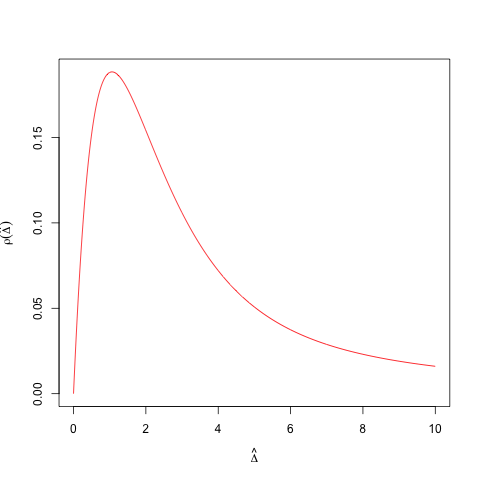

In [2]:
%%R

# Bouchaud, Mézard and Potters book density computation with mu=0.5
rho <- function(f){
  function(delhat){
  f1 <- function(u){sinh(u)*f(u)};
  tmp1 <-  if(delhat < 0.00001) 0 else exp(-delhat)*integrate(f1, lower = 0, upper = delhat)$value;
  f2 <- function(u){exp(-u)*f(u)};
  tmp2 <- if(delhat < 0.00001) 0 else sinh(delhat)*integrate(f2, lower = delhat, upper = Inf)$value;
  return(tmp1+tmp2);
  }
}

# Book density assuming rain distribution of incoming limit orders is Student-t with mu degrees of freedom
ft <- function(mu){function(u){dt(u, df=mu)}};
rhov <- function(mu){function(u){sapply(u,rho(ft(mu)))}};
normt <- function(mu){integrate(rhov(mu),lower=0,upper=700)$value};
rhovn <- function(mu){function(u){rhov(mu)(u)/normt(mu)}};

# Book shape plot
curve(rhovn(.5)(x),from=.0,to=10,col="red",xlab=expression(hat(Delta)),ylab=expression(rho(hat(Delta))),n=1000);

### Virtual price impact

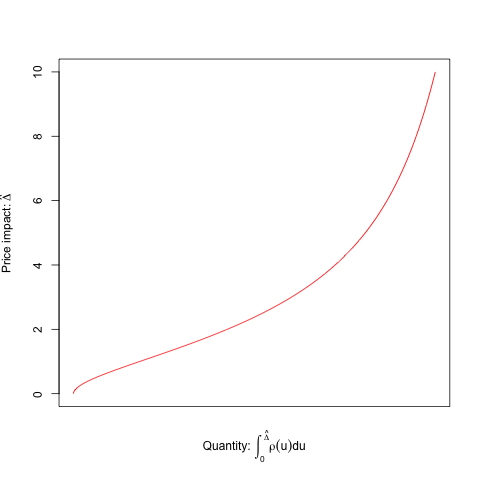

In [3]:
%%R

# Cumulative order density computation
cumrho <- function(delhat,mu){
return(integrate(rhov(mu),lower = 0, upper = delhat)$value);
}

cumrhov <- function(delhat,mu){sapply(delhat,function(u){cumrho(u,mu)})}

# Compute vector
y <- (0:1000)/100;
x <- cumrhov(y,.5);

# Virtual impact plot
plot(x,y,col="red",type="l",ylab = expression(paste("Price impact: ",hat(Delta))),
xlab = expression(paste("Quantity: ",integral(rho(u)*du,0,hat(Delta)))),
xaxt="n"
)

### Impact for high trading rates

-   <span> You can’t trade more than the total depth of the book so
    price impact increases without limit as $n \rightarrow n_{max}$.
    </span>


-   <span>For a sufficiently large trading rate $v$, it can be shown
    that $$f(v) \sim \frac{1}{(1-v/v_{max})^{1/\mu}}$$</span>


-   <span> Setting $v = v_{max}\,(1-\epsilon)$ and taking the limit
    $\epsilon \to 0$,
    $$f(v) \sim \frac{1}{\epsilon^{1/\mu}} \textrm{ as } \epsilon \to 0.$$</span>


-   <span>Imagine we accumulate stock at a rate close to $v_{max}:=1$
    and liquidate at some (lower) rate $v$.</span>

    -   <span>This is the pump and dump strategy!</span>



### Impact for high trading rates continued

-   Substituting into condition [(11)](#eq:fconstraint) gives

    \begin{eqnarray*}
    &&\frac{1}{\epsilon^{1/\mu}} \, \left\{(1-\epsilon)\,{v}^{1-\gamma}
    -(1-\epsilon + v)^{2-\gamma}+{(1-\epsilon)}^{2-\gamma}+{v}^{2-\gamma}\right\} + f\left(v\right)\,{(1-\epsilon)}^{2 - \gamma }
     \geq 0\end{eqnarray*}


-  We observe that price manipulation is possible only if

    $$h(v,\,\gamma):={v}^{1-\gamma} -(1 + v)^{2-\gamma}+1+{v}^{2-\gamma} < 0.$$



### Graphical illustration

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/Liquidity2008largev.png" align = "center" width=500></h2>

-   <span>We see from the picture that $h(v,\gamma)<0$ is equivalent to
    $$\gamma < \gamma^*:=2-\frac{\log 3}{\log 2}\approx 0.415$$ </span>

-   <span>So if $\gamma>\gamma^*$, there is no arbitrage.</span>



### More on high trading rates

-   <span>Also, $h(v,\,\gamma)$ decreases as $v \to v_{max}(=1)$ so the
    arbitrage is maximized near $v = v_{max}$.</span>

    -   <span>However, we already know that there is no arbitrage when
        trading in and out at the same rate.</span>


-   <span>A careful limiting argument nevertheless shows that arbitrage
    is still possible in principle for every $\gamma < \gamma^*$.
    </span>


-   We deduce that, *independent* of the particular exponent $\mu$ in
    the power law of limit order arrivals, the no-arbitrage condition
    is:

<font color="red">
####<span>Large size no arbitrage condition</span>

$$\gamma > \gamma^* =2-\frac{\log 3}{\log 2}$$

### Summary

-   Assuming a price process of the form
    $$S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s$$  
    and imposing the principle of no price manipulation we showed that
    if the instantaneous market impact functions $f(\cdot)$ is
    nonlinear, the decay kernel $G(\cdot)$ must be singular at the
    origin.


-  In particular, if $f(v) \propto v^\delta$ and $G(\tau) \sim \tau^{-\gamma}$, we must have
    $$\gamma +\delta \geq 1.$$


-   <span> By considering the tails of the limit-order book, we deduce
    that
    $$\gamma \geq \gamma^* := 2- \frac{\log{3}}{\log{2}}\approx 0.415.$$
    </span>



### Summary continued

-   <span>We then observe that if the average cost of a (not-too-large)
    VWAP execution is roughly independent of duration, the exponent
    $\delta$ of the power law of market impact should satisfy:
    $$\delta+\gamma \approx 1$$ </span>


-   <span>Finally, we note that empirical estimates are
    $\gamma \approx 0.4$ (Bouchaud et al.) and $\delta \approx 0.6$
    (Algren et al.)</span>


-   <span>Our no price manipulation principle links these
    observations!</span>



### Schematic presentation of results

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/Liquidity2008summary.png" align = "center" width=500></h2>

### Compatibility with empirical observation

-   The recent empirical findings of [Bershova and Rakhlin]<sup id="cite_ref-Bershova" class="reference"><a href="#cite_note-Bershova"><span>[</span>2<span>]</span></a></sup> suggest that the FGLW
    model is closer to reality than the Bouchaud model, thus
    invalidating [(4)](#eq:process) as a good model for the evolution of the stock price
    during execution of a metaorder.


-   However the FGLW model obviously violates the principle of no price
    manipulation.

    -   Assuming a power-law distribution of order sizes, permanent
        impact is also power-law and certainly nonlinear in the FGLW
        model.


-   The work of [Donier]<sup id="cite_ref-Donier" class="reference"><a href="#cite_note-Donier"><span>[</span>4<span>]</span></a></sup> suggests how this and other technical
    difficulties with the FGLW model may be resolved.


-   More recent empirical work by [Waelbroeck and Gomes]<sup id="cite_ref-WaelbroeckGomes" class="reference"><a href="#cite_note-WaelbroeckGomes"><span>[</span>6<span>]</span></a></sup> suggests that only
    informed orders have permanent impact.

    -   If so, this offers another way to eliminate price manipulation
        in the FGLW model.

-   It is still work in progress ...



### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-Almgren"><span class="mw-cite-backlink"><b><a href="#cite_ref-Almgren">^</a></b></span>Robert Almgren, Chee Thum, Emmanuel Hauptmann, and Hong Li, Equity
market impact, <span>*Risk*</span> July 2005, 57–62.
  </li>

  <li id="cite_note-Bershova"><span class="mw-cite-backlink"><b><a href="#cite_ref-Bershova">^</a></b></span>Nataliya Bershova and Dmitry Rakhlin, The Non-Linear Market Impact of
Large Trades: Evidence from Buy-Side Order Flow, <span>*Quantitative
Finance*</span> <span>**13**</span>(11) 1759–1778 (2013).
  </li>
  
  <li id="cite_note-BMP"><span class="mw-cite-backlink"><b><a href="#cite_ref-BMP">^</a></b></span>Jean-Philippe Bouchaud, Marc Mézard and Marc Potters, Statistical
properties of stock order books: empirical results and models,
<span>*Quantitative Finance*</span> <span>**2**</span>(4) 251–256
(2002).
  </li>
  
  <li id="cite_note-Donier"><span class="mw-cite-backlink"><b><a href="#cite_ref-Donier">^</a></b></span>Jonathan Donier, Market Impact with Autocorrelated Order Flow under
Perfect Competition, <span>*SSRN*</span> available at
<http://ssrn.com/abstract=2191660> (2012).
  </li>
  
  <li id="cite_note-FGLW"><span class="mw-cite-backlink"><b><a href="#cite_ref-FGLW">^</a></b></span>J Doyne Farmer, Austin Gerig, Fabrizio Lillo, and Henri Waelbroeck, How
efficiency shapes market impact, available at <span>*Quantitative
Finance*</span> <span>**13**</span>(11) 1743–1758 (2013).
  </li>
  
  <li id="cite_note-Gatheral"><span class="mw-cite-backlink"><b><a href="#cite_ref-Gatheral">^</a></b></span>Jim Gatheral, No-dynamic-arbitrage and market impact,
<span>*Quantitative Finance*</span> <span>**10**</span>(7) 749–759
(2010).
  </li>

  <li id="cite_note-GSS"><span class="mw-cite-backlink"><b><a href="#cite_ref-GSS">^</a></b></span>Jim Gatheral, Alexander Schied, and Alla Slynko, Exponential resilience
and decay of market impact, in <span>*Econophysics of Order-driven
Markets*</span>, Springer, 225–236, (2011).
  </li>
  
  <li id="cite_note-LilloMikeFarmer"><span class="mw-cite-backlink"><b><a href="#cite_ref-LilloMikeFarmer">^</a></b></span>Fabrizio Lillo, Szabolcs Mike, and J Doyne Farmer, Theory for long
memory in supply and demand, <span>*Phys. Rev. E*</span>
<span>**71**</span>(6) 66122 (2005).
  </li>
  
  <li id="cite_note-Moro"><span class="mw-cite-backlink"><b><a href="#cite_ref-Moro">^</a></b></span>Esteban Moro, Javier Vicente, Luis G Moyano, Austin Gerig, J. Doyne
Farmer, Gabriella Vaglica, Fabrizio Lillo, and Rosario N Mantegna,
Market impact and trading profile of meta orders in stock markets,
<span>*Physical Review E*</span> <span>**80**</span>(6) 066102 (2009).
  </li>
  
  <li id="cite_note-ObizhaevaWang"><span class="mw-cite-backlink"><b><a href="#cite_ref-ObizhaevaWang">^</a></b></span>Anna Obizhaeva and Jiang Wang, Optimal trading strategy and
supply/demand dynamics <span>*Journal of Financial Markets*</span>
<span>**16**</span>(1) 1–32 (2013).
  </li>
  
  <li id="cite_note-SFGK"><span class="mw-cite-backlink"><b><a href="#cite_ref-SFGK">^</a></b></span>E Smith, JD Farmer, L Gillemot, and S Krishnamurthy, Statistical theory
of the continuous double auction, <span>*Quantitative Finance*</span>
<span>**3**</span>(6) 481–514 (2003).
  </li>
  
  <li id="cite_note-Toth"><span class="mw-cite-backlink"><b><a href="#cite_ref-Toth">^</a></b></span>Bence Tóth, Yves Lempérière, Cyril Deremble, Joachim de Lataillade,
Julien Kockelkoren, and Jean-Philippe Bouchaud, Anomalous price impact
and the critical nature of liquidity in financial markets,
<span>*Physical Review X*</span> 021006, 1-11(2011).
  </li>
  
  <li id="cite_note-WaelbroeckGomes"><span class="mw-cite-backlink"><b><a href="#cite_ref-WaelbroeckGomes">^</a></b></span>Henri Waelbroeck and Carla Gomes, Is Market Impact a Measure of the
Information Value of Trades? Market Response to Liquidity vs. Informed
Trades, <span>*SSRN*</span> available at
<http://ssrn.com/abstract=2291720> (2013).
  </li>

  
</ol>